In [33]:
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
# Load the data into DataFrame `friends`
friends = pd.read_excel('https://lagunita.stanford.edu/assets/courseware/v1/27ad2186b0c683f8fbf7d49f6853fb28/asset-v1:OLI+ProbStat+Open_Jan2017+type@asset+block/friends.xls')

In [35]:
friends.head()

,Friends
0,Opposite sex
1,No difference
2,Opposite sex
3,No difference
4,Opposite sex


In [36]:
# Pivot table
friends['Count'] = 1
table = friends.pivot_table(index='Friends', values='Count', aggfunc='sum')
table

,Count
Friends,
No difference,602
Opposite sex,434
Same sex,164


In [37]:
# Add total row
table.loc['Total'] = table.sum()
table

,Count
Friends,
No difference,602
Opposite sex,434
Same sex,164
Total,1200


In [38]:
# Add `Proportion` column
table['Proportion'] = table['Count'] / table.at['Total', 'Count']
table

,Count,Proportion
Friends,,
No difference,602,0.501667
Opposite sex,434,0.361667
Same sex,164,0.136667
Total,1200,1.000000


In [39]:
# Add `Percentage` column
table['Percentage'] = table['Proportion'].apply(lambda x: '{:.2f}%'.format(x*100))
table

,Count,Proportion,Percentage
Friends,,,
No difference,602,0.501667,50.17%
Opposite sex,434,0.361667,36.17%
Same sex,164,0.136667,13.67%
Total,1200,1.000000,100.00%


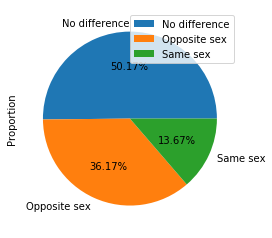

In [54]:
# Pie plot
ax = table[:-1].plot.pie(y='Proportion', autopct='%.2f%%')
plt.show()